In [25]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Problem 1

Here's our theoretical gamma ray data, with an assumed average of 7 events per day. 

### 1A

Text(0, 0.5, 'probability')

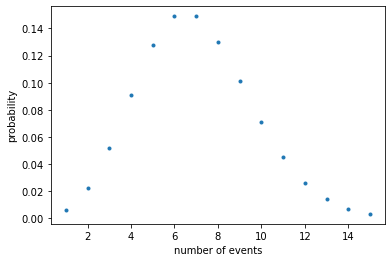

In [29]:
fig , ax = plt.subplots(1,1)

m = 7

x = np.arange(stats.poisson.ppf(0.001, m), stats.poisson.ppf(0.999, m))

pois_dist = stats.poisson.pmf(x, m)

plt.plot(x, pois_dist, '.')
plt.xlabel("number of events")
plt.ylabel("probability")

Text(0, 0.5, 'probability')

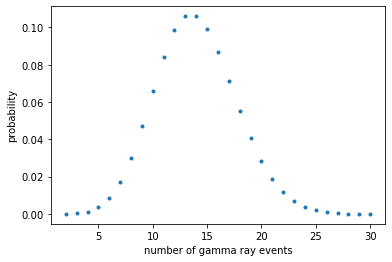

In [30]:
change_dist = pois_dist
base = change_dist

days_num = 2

for i in range(1, days_num):
    conv = np.convolve(change_dist, base)
    change_dist = conv
    
fig, ax = plt.subplots(1, 1)

x = np.arange(len(conv)) + days_num #offset by number of sum

plt.plot(x, conv, '.')
plt.xlabel("number of gamma ray events")
plt.ylabel("probability")

For two days, we can see that the left side tail of the distribution begins to take the shape closer to that of the right side, and the shape begins to shift towards that of a Gaussian

Text(0, 0.5, 'probability')

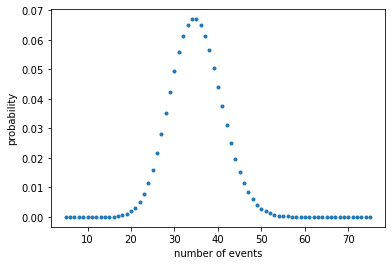

In [32]:
change_dist = pois_dist
base = change_dist

days_num = 5

for i in range(1, days_num):
    conv = np.convolve(change_dist, base)
    change_dist = conv
    
fig, ax = plt.subplots(1, 1)

x = np.arange(len(conv)) + days_num #offset by number of sum

plt.plot(x, conv, '.')
plt.xlabel("number of events")
plt.ylabel("probability")

### 1B

By 5 days, the shape is nearly gaussian.

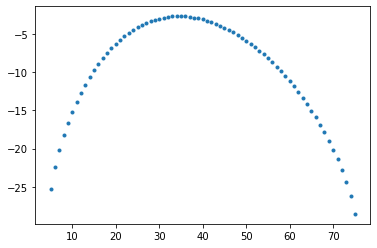

In [33]:
plt.plot(x, np.log(conv), '.')
plt.xlabel("number of gamma ray events")
plt.ylabel("probability")

The semilog plot shows that there's stil clearly some sort of skew here, even if it's hard to see in the graph with linear scales.

### 1C

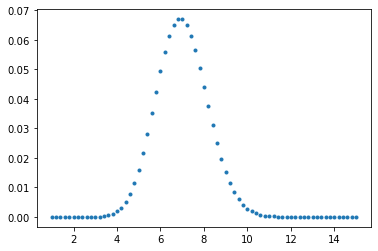

In [7]:
change_dist = pois_dist
base = change_dist

days_num = 5

for i in range(1, days_num):
    conv = np.convolve(change_dist, base)
    change_dist = conv

fig, ax = plt.subplots(1, 1)

x = np.arange(len(conv)) 

x = (x + days_num)/days_num

plt.plot(x, conv, '.')
plt.xlabel("number of gamma ray events")
plt.ylabel("probability")

Averaging the 5 day distribution does not change the anything about the curve, but just changes the mean back to the single-day mean of 7.

### 1D

Chosen interval of 10 days, over which we observe 140 gamma rays, compared to the expected value of 70

Text(0, 0.5, 'probability')

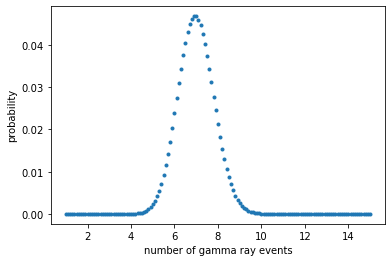

In [59]:
change_dist = pois_dist
base = change_dist

days_num = 10

for i in range(1, days_num):
    conv = np.convolve(change_dist, base)
    change_dist = conv

fig, ax = plt.subplots(1, 1)

x = np.arange(len(conv)) 

x = (x + days_num)/days_num

plt.plot(x, conv, '.')
plt.xlabel("number of gamma ray events")
plt.ylabel("probability")

Text(0, 0.5, 'probability')

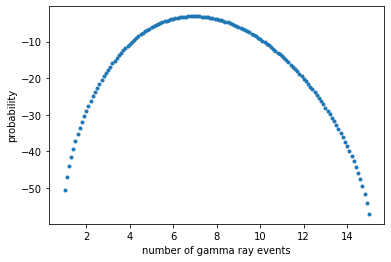

In [60]:
plt.plot(x, np.log(conv), '.')
plt.xlabel("number of gamma ray events")
plt.ylabel("probability")

In [10]:
a = stats.poisson.cdf(14, m)

In [11]:
stats.norm.ppf(a)

2.5291349591461594

# Problem 2

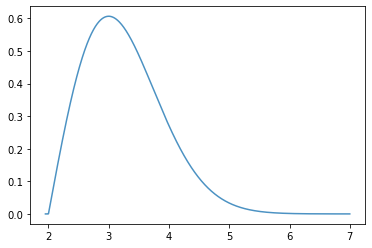

In [12]:
fig , ax = plt.subplots(1,1)

xleft = 1.95
xright = 7
x = np.linspace(xleft,xright,1000)

ray_dist = stats.rayleigh.rvs(loc = 2.0, scale = 1, size = 1000)
plt.plot(x, stats.rayleigh.pdf(x,loc = 2, scale = 1),alpha = 0.8)
plt.xlabel("events")
plt.ylabel("probability of events")

Text(0, 0.5, 'probability of events')

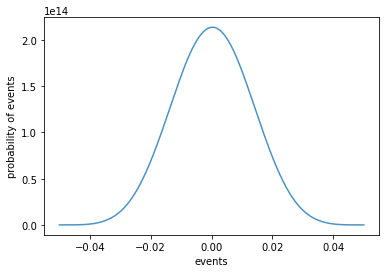

In [62]:
change_dist = ray_dist
base = change_dist

days_num = 5

for i in range(1, days_num):
    conv = np.convolve(change_dist, base)
    change_dist = conv

fig, ax = plt.subplots(1, 1)

x = np.linspace(xleft,xright,len(conv)) 

plt.plot(x, conv, alpha = 0.8)
plt.xlabel("events")
plt.ylabel("probability of events")

Looks pretty close to gaussian! lets check the semilog plot.

Text(0, 0.5, 'probability of events')

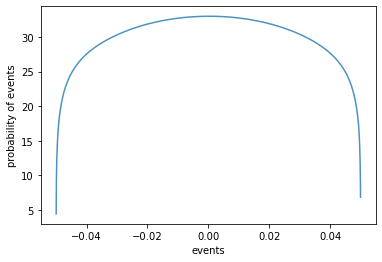

In [63]:
plt.plot(x, np.log(conv), alpha = 0.8)
plt.xlabel("events")
plt.ylabel("probability of events")

Looks can be deceiving!

## Problem 3

### Version 1

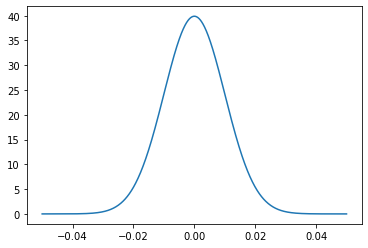

In [74]:
fig, ax = plt.subplots(1, 1)

xleft = -0.05
xright = 0.05

x = np.linspace(xleft,xright,1000)
ax.plot(x,stats.norm.pdf(x, loc = 0, scale = 0.01))

In [76]:
norm_cdf = stats.norm.cdf(0.05, loc = 0, scale = 0.01)

stats.norm.ppf(norm_cdf)

4.999999999970176

Very nearly 5 sigma, but not quite!

### Version 2

B) Looking through 10k pixels will be an average of the distribution of one pixel, which is still a gaussian. The probability of discovery should increase with an increased number of trials by a factor of 10000, decreasing the sigma value of the event.

Text(0, 0.5, 'signal strength')

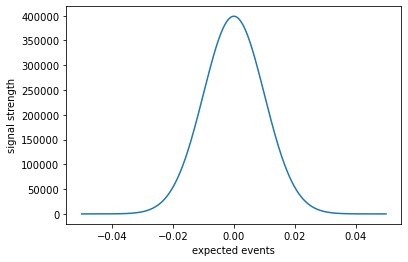

In [77]:
plt.plot(x, 10000 * stats.norm.pdf(x, loc = 0, scale = 0.01))
plt.xlabel("expected events")
plt.ylabel("signal strength")

In [18]:
norm_cdf = stats.norm.cdf(0.05, loc = 0, scale = 0.01)

norm_cdf = (1-norm_cdf) * 10000

print(norm_cdf)

stats.norm.ppf(1 - 0.002866515719235352)

0.002866515719235352


2.76267218285754

Our new significance is 2.76 sigma, much lower, as our probability of detection has massively increased. Events that were once anomalous quickly become common.

### Problem 4

our candidate signal for problem 3 was luckily just around the threshold for a 5 sigma event, therefore our V.1 5 sigma is just about 0.05.

In [19]:
norm_cdf = stats.norm.cdf(0.065505, loc = 0, scale = 0.01)

norm_cdf = (1-norm_cdf) * 10000

print(norm_cdf)

stats.norm.ppf(1 - norm_cdf)

2.867239778936437e-07


4.999951304062789

C) Our V.2 signal is around 0.065505, which at first glance seems close to our previous value, but this is actually over 30% larger! Assuming other signals follow this rule, this is about the change in detection threshold. In the larger scheme of things, a 30% difference is quite large, but when considering that we performed 10,000 trials to get here, this difference gets put into some amount of perspective. 

In [20]:
norm_cdf = stats.norm.cdf(0.0781, loc = 0, scale = 0.01)

norm_cdf = (1-norm_cdf) * 100000000

print(norm_cdf)

stats.norm.ppf(1 - norm_cdf)

2.886579864025407e-07


4.998654974276134

Upping the trials by another factor of 10,000 results in another 20% change in the discovery threshold. At this point, Python begins to struggle with exact decimal places, so my answer here is less exact.

### EC

In [47]:
ray_cdf = stats.rayleigh.cdf(0.065855, loc = 0, scale = 0.01)

ray_cdf = (1-ray_cdf) * 10000

print(ray_cdf)

stats.rayleigh.ppf(1 - ray_cdf)

3.8245695499483645e-06


4.994810233228012

In [57]:
ray_cdf = stats.rayleigh.cdf(0.07864, loc = 0, scale = 0.01)

ray_cdf = (1-ray_cdf) * 100000000

print(ray_cdf)

stats.rayleigh.ppf(1 - ray_cdf)

3.7192471324942744e-06


5.000397842952032

In [58]:
0.07864/0.065855

1.1941386379166352

The trials factor seems to be about the same! This was somewhat unexpected, but makes sense considering how large the number of trials I chose was, which seems to dominate any difference in data distribution.